<a href="https://colab.research.google.com/github/Tigereagle12345/SF2024-25/blob/main/SF_2024_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SECTION: SETUP

NOTE: This section is soley to set up the work environment, and will not be included in training time.

In [2]:
# Setup environment
!rm -rf /content/sample_data
!rm -f /content/class_names.json
!rm -f /content/sign_mnist.zip
!rm -f /content/sign_mnist_test.csv
!rm -f /content/sign_mnist_train.csv
!rm -rf /content/sign_mnist*
!rm -f /content/MNIST_CSV.zip
!rm -f /content/mnist_test.csv
!rm -f /content/mnist_train.csv
!rm -rf /content/mnist*
!rm -f /content/fashion_mnist.zip
!rm -f /content/fashion_mnist_test.csv
!rm -f /content/fashion_mnist_train.csv
!rm -rf /content/fashion_mnist*
!pip install --upgrade gdown

In [3]:
!gdown "1eEKzfmEu6WKdRlohBQiqi3PhW_uIVJVP&confirm=t"                            # Downloads MNIST dataset
!unzip -F "/content/MNIST_CSV.zip" && rm -f "/content/MNIST_CSV.zip" && rm -f "/content/readme.md" && rm -f "/content/generate_mnist_csv.py"

!gdown "13CrcGGhwzHR8BXnp_f_JDr52LugCYBjq&confirm=t"                            # Downloads Fashion-MNIST dataset
!unzip -F "/content/fashion_mnist.zip" && rm -f "/content/fashion_mnist.zip"

!gdown "1pSCgqi4l954aBEXBeZ5QcGNPrScD86M4&confirm=t"                            # Downloads Sign Language MNIST dataset
!unzip -F "/content/sign_mnist.zip" && rm -f "/content/sign_mnist.zip"

Downloading...
From: https://drive.google.com/uc?id=1eEKzfmEu6WKdRlohBQiqi3PhW_uIVJVP&confirm=t
To: /content/MNIST_CSV.zip
100% 15.5M/15.5M [00:00<00:00, 57.4MB/s]
Archive:  /content/MNIST_CSV.zip
  inflating: generate_mnist_csv.py   
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         
  inflating: readme.md               
Downloading...
From: https://drive.google.com/uc?id=13CrcGGhwzHR8BXnp_f_JDr52LugCYBjq&confirm=t
To: /content/fashion_mnist.zip
100% 38.9M/38.9M [00:01<00:00, 35.5MB/s]
Archive:  /content/fashion_mnist.zip
  inflating: fashion_mnist_test.csv  
  inflating: fashion_mnist_train.csv  
Downloading...
From: https://drive.google.com/uc?id=1pSCgqi4l954aBEXBeZ5QcGNPrScD86M4&confirm=t
To: /content/sign_mnist.zip
100% 29.7M/29.7M [00:00<00:00, 81.9MB/s]
Archive:  /content/sign_mnist.zip
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_test.csv     


SECTION: PREPROCESSING

NOTE: This section is for the trasformation of datasets from csv to images, and will not be included in training time.

In [4]:
import os
import json
from PIL import Image
import pandas as pd
import numpy as np
import datetime
import random
from tqdm import tqdm

In [5]:
def proccessDataset(dataset_path, label, header):                               # Loads and reformats datasets
  df = pd.read_csv(dataset_path, header=header)
  print(df.shape)
  data = pd.DataFrame(columns=["label", "img"])
  data["label"] = df[label]
  df = df.drop(label, axis=1)
  data["img"] = df.apply(lambda x: x.to_numpy().reshape(28,28), axis=1)
  return data

In [6]:
def genMetadata(classes, data):                                                 # Generates dataset metadata
  metadata = {}
  counts = data["label"].value_counts()
  for label in data["label"].unique():
    label = int(label)
    metadata[label] = {"name":classes[label],"count":int(counts[label])}
  print(metadata)
  return metadata

In [7]:
def saveImages(save_dir, data, metadata, tt):                                   # Saves out images
  if os.path.exists(f"{save_dir}{tt}"):                                         # Determine if a save directory already exists, and if not, make one.
    os.system(f"rm -rf {save_dir}{tt}")                                         # Deletes existing save directory to prevent duplication of data
    os.makedirs(f"{save_dir}{tt}")
  else:
    os.makedirs(f"{save_dir}{tt}")

  for label in data["label"].unique():                                          # Create a dataset for each class
    if not os.path.exists(f"{save_dir}{tt}{str(label)}/"):
      os.mkdir(f"{save_dir}{tt}{str(label)}/")

  data["img"] = data.apply(lambda x: Image.fromarray((x["img"] * 255).astype(np.uint8)), axis=1) # Transform each array in the "img" column to be an image with the Pillow format
  data.apply(lambda x: x["img"].save(f"{save_dir}{tt}{str(x['label'])}/{str(datetime.datetime.now().timestamp()).replace('.','_')}.png"), axis=1) # Save each image to the save directory
  with open(f"{save_dir}{tt}metadata.json", "w") as file:
    file.write(json.dumps(metadata))

In [8]:
def setup(dataset_path, label, classes, save_dir, header):                      # Applies preprocessing to datasets
  if "train" in dataset_path:
    tt = "train/"
  elif "test" in dataset_path:
    tt = "test/"
  else:
    exit()                                                                      # Exits if invalid dataset files are provided

  data = proccessDataset(dataset_path, label, header)                           # Processes dataset
  metadata = genMetadata(classes, data)                                         # Generates metadata
  saveImages(save_dir, data, metadata, tt)                                      # Saves images

In [9]:
setup("/content/mnist_train.csv",0,["0","1","2","3","4","5","6","7","8","9"],"/content/mnist/",None) # Setup MNIST training dataset
setup("/content/mnist_test.csv",0,["0","1","2","3","4","5","6","7","8","9"],"/content/mnist/",None)  # Setup MNIST testing dataset
!mv /content/mnist_train.csv /content/mnist/
!mv /content/mnist_test.csv /content/mnist/

(60000, 785)
{5: {'name': '5', 'count': 5421}, 0: {'name': '0', 'count': 5923}, 4: {'name': '4', 'count': 5842}, 1: {'name': '1', 'count': 6742}, 9: {'name': '9', 'count': 5949}, 2: {'name': '2', 'count': 5958}, 3: {'name': '3', 'count': 6131}, 6: {'name': '6', 'count': 5918}, 7: {'name': '7', 'count': 6265}, 8: {'name': '8', 'count': 5851}}
(10000, 785)
{7: {'name': '7', 'count': 1028}, 2: {'name': '2', 'count': 1032}, 1: {'name': '1', 'count': 1135}, 0: {'name': '0', 'count': 980}, 4: {'name': '4', 'count': 982}, 9: {'name': '9', 'count': 1009}, 5: {'name': '5', 'count': 892}, 6: {'name': '6', 'count': 958}, 3: {'name': '3', 'count': 1010}, 8: {'name': '8', 'count': 974}}


In [10]:
setup("/content/fashion_mnist_train.csv","label",["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"],"/content/fashion_mnist/",0) # Setup Fashion-MNIST training dataset
setup("/content/fashion_mnist_test.csv","label",["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"],"/content/fashion_mnist/",0)  # Setup Fashion-MNIST testing dataset
!mv /content/fashion_mnist_train.csv /content/fashion_mnist/
!mv /content/fashion_mnist_test.csv /content/fashion_mnist/

(60000, 785)
{9: {'name': 'Ankle boot', 'count': 6000}, 0: {'name': 'T-shirt/top', 'count': 6000}, 3: {'name': 'Dress', 'count': 6000}, 2: {'name': 'Pullover', 'count': 6000}, 7: {'name': 'Sneaker', 'count': 6000}, 5: {'name': 'Sandal', 'count': 6000}, 1: {'name': 'Trouser', 'count': 6000}, 6: {'name': 'Shirt', 'count': 6000}, 4: {'name': 'Coat', 'count': 6000}, 8: {'name': 'Bag', 'count': 6000}}
(10000, 785)
{9: {'name': 'Ankle boot', 'count': 1000}, 2: {'name': 'Pullover', 'count': 1000}, 1: {'name': 'Trouser', 'count': 1000}, 6: {'name': 'Shirt', 'count': 1000}, 4: {'name': 'Coat', 'count': 1000}, 5: {'name': 'Sandal', 'count': 1000}, 7: {'name': 'Sneaker', 'count': 1000}, 3: {'name': 'Dress', 'count': 1000}, 8: {'name': 'Bag', 'count': 1000}, 0: {'name': 'T-shirt/top', 'count': 1000}}


In [11]:
setup("/content/sign_mnist_train.csv","label",["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"],"/content/sign_mnist/", 0) # Setup Sign Language MNIST training dataset
setup("/content/sign_mnist_test.csv","label",["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"],"/content/sign_mnist/", 0)  # Setup Sign Language MNIST testing dataset
!mv /content/sign_mnist_train.csv /content/sign_mnist/
!mv /content/sign_mnist_test.csv /content/sign_mnist/

(27455, 785)
{3: {'name': 'D', 'count': 1196}, 6: {'name': 'G', 'count': 1090}, 2: {'name': 'C', 'count': 1144}, 13: {'name': 'N', 'count': 1151}, 16: {'name': 'Q', 'count': 1279}, 8: {'name': 'I', 'count': 1162}, 22: {'name': 'W', 'count': 1225}, 18: {'name': 'S', 'count': 1199}, 10: {'name': 'K', 'count': 1114}, 20: {'name': 'U', 'count': 1161}, 17: {'name': 'R', 'count': 1294}, 19: {'name': 'T', 'count': 1186}, 21: {'name': 'V', 'count': 1082}, 23: {'name': 'X', 'count': 1164}, 24: {'name': 'Y', 'count': 1118}, 1: {'name': 'B', 'count': 1010}, 12: {'name': 'M', 'count': 1055}, 11: {'name': 'L', 'count': 1241}, 15: {'name': 'P', 'count': 1088}, 4: {'name': 'E', 'count': 957}, 0: {'name': 'A', 'count': 1126}, 5: {'name': 'F', 'count': 1204}, 7: {'name': 'H', 'count': 1013}, 14: {'name': 'O', 'count': 1196}}
(7172, 785)
{6: {'name': 'G', 'count': 348}, 5: {'name': 'F', 'count': 247}, 10: {'name': 'K', 'count': 331}, 0: {'name': 'A', 'count': 331}, 3: {'name': 'D', 'count': 245}, 21: {'

In [12]:
def partition(sizes, dataset, subset):                                          # Partition datasets into groups of varying sizes
  if subset not in ["train", "test"]:
    raise KeyError(f"Subset {subset} does not exist!")

  for size in sizes:
    if size%10 != 0:
      raise ValueError(f"Dataset of size {size} does not allow for equal representation between classes!")

  imgs = {}
  dirs = os.listdir(f"/content/{dataset}/{subset}/")
  dirs.remove("metadata.json")
  for dir in dirs:
    imgs[dir] = []
    for img in os.listdir(f"/content/{dataset}/{subset}/{dir}/"):
      imgs[dir].append(img)

  datasets = {}
  for size in sizes:
    datasets[size] = {}
    for label in (pbar := tqdm(list(range(0,10)))):
      if subset == "train":
        pbar.set_description(f"Processing {dataset}_{size}")
      else:
        pbar.set_description(f"Processing {dataset}_{subset}")

      if dataset == "sign_mnist":
        if label == 4:
          label = 10
        elif label == 9:
          label = 11

      label = str(label)
      datasets[size][label] = random.sample(imgs[label], int(size / 10))

      if subset == "train":
        if os.path.exists(f"/content/{dataset}_{size}/{label}/"):
          os.system(f"rm -rf /content/{dataset}_{size}/{label}/")
          os.makedirs(f"/content/{dataset}_{size}/{label}/")
        else:
          os.makedirs(f"/content/{dataset}_{size}/{label}/")

        for img_name in datasets[size][label]:
          img = Image.open(f"/content/{dataset}/{subset}/{label}/{img_name}")
          img.save(f"/content/{dataset}_{size}/{label}/{img_name}")
      else:
        if os.path.exists(f"/content/{dataset}_{subset}/{label}/"):
          os.system(f"rm -rf /content/{dataset}_{subset}/{label}/")
          os.makedirs(f"/content/{dataset}_{subset}/{label}/")
        else:
          os.makedirs(f"/content/{dataset}_{subset}/{label}/")

        for img_name in datasets[size][label]:
          img = Image.open(f"/content/{dataset}/{subset}/{label}/{img_name}")
          img.save(f"/content/{dataset}_{subset}/{label}/{img_name}")

In [13]:
partition([100, 1000, 10000], "mnist", "train")                                 # Partition the MNIST training dataset into subdatasets of 100, 1000, and 10000 images
partition([1000], "mnist", "test")                                               # Partition the MNIST testing dataset into a subdataset of 1000 images

partition([100, 1000, 10000], "fashion_mnist", "train")                         # Partition the Fashion-MNIST training dataset into subdatasets of 100, 1000, and 10000 images
partition([1000], "fashion_mnist", "test")                                       # Partition the Fashion-MNIST testing dataset into a subdataset of 1000 images

partition([100, 1000, 10000], "sign_mnist", "train")                            # Partition the Sign-Language-MNIST training dataset into subdatasets of 100, 1000, and 10000 images
partition([1000], "sign_mnist", "test")                                          # Partition the Sign-Language-MNIST testing dataset into a subdataset of 1000 images

Processing sign_mnist_test: 100%|██████████| 10/10 [00:00<00:00, 13.94it/s]


SECTION: MODEL SETUP

NOTE: This section sets up the model and will not be included in the training time.

In [14]:
import os
import tensorflow as tf
import json
import pandas as pd
from tqdm import tqdm

In [15]:
def buildModel(dataset_path):                                                   # Builds tensorflow model
  dataset_url = dataset_path                                                    # Set dataset url
  activation = "relu"                                                           # Set activation function to ReLU
  batch_size = 10                                                               # Set batch size to 10
  image_size = (28,28)                                                          # Set image size to 28 by 28 pixels
  seed = 123                                                                    # Set seed to 123
  validation_split = 0.2                                                        # Set training validation split to 80% 20%
  num_classes = 10                                                              # Set number of classes to 10

  train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split=validation_split,
  subset="training",
  seed=seed,
  image_size=image_size,
  batch_size=batch_size)                                                        # Create training subdataset

  val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_url,
  validation_split=validation_split,
  subset="validation",
  seed=seed,
  image_size=image_size,
  batch_size=batch_size)                                                        # Create validation subdataset

  class_names = train_ds.class_names                                            # Save class names as json. NOTE: This is because tensorflow assigns class ids based on read order and can create weird distributions
  print(class_names)

  class_json = {}
  for i in range(len(class_names)):
    class_json[i] = class_names[i]

  with open(f"{dataset_path}/class_names.json", "w") as file:
    file.write(json.dumps(class_json))

  normalization_layer = tf.keras.layers.Rescaling(1./255)                       # Create a normalization layer to scale image data between 0 and 1

  normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))        # Apply normilization layer to training dataset
  image_batch, labels_batch = next(iter(normalized_ds))

  first_image = image_batch[0]                                                  # Prints minimum and maximum pixel values to confirm success
  print(np.min(first_image), np.max(first_image))

  AUTOTUNE = tf.data.AUTOTUNE                                                   # Optimises CPU usage for input pipeline at runtime (https://stackoverflow.com/questions/56613155/tensorflow-tf-data-autotune)

  train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)                    # Applies AUTOTUNE to training subdataset and caches images
  val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)                        # Applies AUTOTUNE to validation subdataset and caches images

  # data_augmentation = tf.keras.Sequential([                                     # Creates data augmentation layers
  # tf.keras.layers.RandomFlip("horizontal_and_vertical"),                        # Introduces random horizontal and vertical flips into the data
  # tf.keras.layers.RandomRotation(0.2),                                          # Introduces a random rotation of the data
  # tf.keras.layers.RandomZoom(0.2, 0.5)                                          # Introduces a random zoom in the data
  # ])

  try:                                                                          # Set up TPU for use
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    print("All devices: ", tf.config.list_logical_devices('TPU'))
    tpu = True
    strategy = tf.distribute.TPUStrategy(resolver)
  except ValueError:
    strategy = tf.distribute.get_strategy()
    tpu = False

  device_name = tf.test.gpu_device_name() if len(tf.test.gpu_device_name()) > 0 else "/CPU:0"

  with strategy.scope() if tpu else tf.device(device_name):
    model = tf.keras.Sequential([                                               # Build model
      # data_augmentation,
      tf.keras.layers.Rescaling(1./255),
      tf.keras.layers.Conv2D(32, 3, activation=activation),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation=activation),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Conv2D(32, 3, activation=activation),
      tf.keras.layers.MaxPooling2D(),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(4096, activation=activation),
      tf.keras.layers.Dense(num_classes, activation="softmax"),
    ])

  model.compile(                                                                # Compile model
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

  return train_ds, val_ds, model

In [16]:
dataset = "mnist"
size = 10000
dataset_path = f"/content/{dataset}_{size}"

epochs = 100

In [17]:
train_ds, val_ds, model = buildModel(dataset_path)                              # Build model

Found 10000 files belonging to 10 classes.
Using 8000 files for training.
Found 10000 files belonging to 10 classes.
Using 2000 files for validation.
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
0.0 1.0


SECTION: TRAINING

NOTE: This section is for training the model and **will** be included in the training time.

In [27]:
import time

start = time.time()

model.fit(                                                                      # Train model
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  verbose=0
)

end = time.time()
timer = end - start
print(timer)

hello
0.0001506805419921875


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:609: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


SECTION: TESTING

NOTE: This section is for testing the accuracy of the model and will not be included in the training time.

In [19]:
model.save(f"{dataset}_{size}.keras")
model.summary()
model.evaluate(train_ds)
model.evaluate(val_ds)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 28, 28, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 32)            │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │         135,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 586,592 (2.24 MB)

 Trainable params: 195,530 (763.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 391,062 (1.49 MB)

800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9969 - loss: 0.0297
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9331 - loss: 1.8031


[1.0553593635559082, 0.9470000267028809]

In [20]:
model = tf.keras.models.load_model(f"{dataset}_{size}.keras")

In [21]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  f"/content/{dataset}_test/",
  image_size=(28,28))

results = model.evaluate(test_ds)
print("test loss, test acc:", results)

Found 1000 files belonging to 10 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9562 - loss: 0.7482
test loss, test acc: [0.8591647744178772, 0.949999988079071]


In [22]:
def predict(model, image_path, image_class, class_names, verbose=False):
  image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28,28))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = np.expand_dims(image, axis = 0)

  prediction = model.predict(image, verbose=verbose)
  confidence = tf.nn.softmax(prediction[0]).numpy() * 100
  predicted_class = np.argmax(prediction, axis=1)

  if verbose:
    print(image_path)
    print(f"Raw prediction: {prediction}")
    print(f"Prediction confidence: {confidence}")
    print(f"Class prediction: {class_names[str(predicted_class[0])]}")
    print(f"Actual class: {image_class}")
    print(f"Result: {1 if class_names[str(predicted_class[0])]==image_class else 0}")

  data = {
      "raw": [prediction.flatten().tolist()],
      "confidence": [confidence.flatten().tolist()],
      "prediction": class_names[str(predicted_class[0])],
      "class": image_class,
      "accuracy": 1 if class_names[str(predicted_class[0])]==image_class else 0
  }

  df = pd.DataFrame(data, columns=list(data.keys()), index=[0])
  return df

In [23]:
image_data = pd.DataFrame(columns=["image_name","image_class","image_path"])
for dir in os.listdir(f"/content/{dataset}_test/"):
  for image in os.listdir(f"/content/{dataset}_test/{dir}/"):
    data = {
        "image_name": f"/content/{dataset}_test/{dir}/{image.replace('.png','')}",
        "image_class": dir,
        "image_path": f"/content/{dataset}_test/{dir}/{image}"
    }
    df = pd.DataFrame(data,index=[0])
    image_data = pd.concat([image_data, df],ignore_index=True)

with open(f"/content/{dataset}_{size}/class_names.json", "r") as file:
    class_names = json.load(file)

results = pd.DataFrame(columns=["raw","confidence","prediction","class","accuracy"])

print(image_data.shape)

for index, row in tqdm(image_data.iterrows(), total=len(image_data.index)):
  # print(row)
  pred = predict(model,row["image_path"],row["image_class"], class_names)
  results = pd.concat([results,pred], ignore_index=True)

print(results.shape)
results.to_csv(f"/content/{dataset}_{size}_results.csv")

(1000, 3)


100%|██████████| 1000/1000 [00:59<00:00, 16.72it/s]

(1000, 5)


In [24]:
results

,raw,confidence,prediction,class,accuracy
0,"[0.0, 0.0, 1.0, 4.63409402152217e-41, 0.0, 0.0...","[8.533675193786621, 8.533675193786621, 23.1969...",2,2,1
1,"[2.8103959953826803e-37, 4.27150655065448e-35,...","[8.533675193786621, 8.533675193786621, 23.1969...",2,2,1
2,"[0.0006200836505740881, 0.8257830142974854, 0....","[8.721098899841309, 19.903749465942383, 10.351...",1,2,0
3,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.28857696...","[8.533675193786621, 8.533675193786621, 23.1969...",2,2,1
4,"[3.436810430179356e-28, 9.831336340672864e-32,...","[8.533675193786621, 8.533675193786621, 23.1969...",2,2,1
...,...,...,...,...,...
995,"[0.9999878406524658, 1.1532617309045756e-12, 4...","[23.19668960571289, 8.533690452575684, 8.53369...",0,0,1
996,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[23.196931838989258, 8.533675193786621, 8.5336...",0,0,1
997,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[23.196931838989258, 8.533675193786621, 8.5336...",0,0,1
998,"[1.0, 0.0, 0.0, 0.0, 4.5421560175789166e-36, 1...","[23.196931838989258, 8.533675193786621, 8.5336...",0,0,1


In [25]:
print((results["accuracy"].value_counts()[1] / 1000) * 100)

95.0


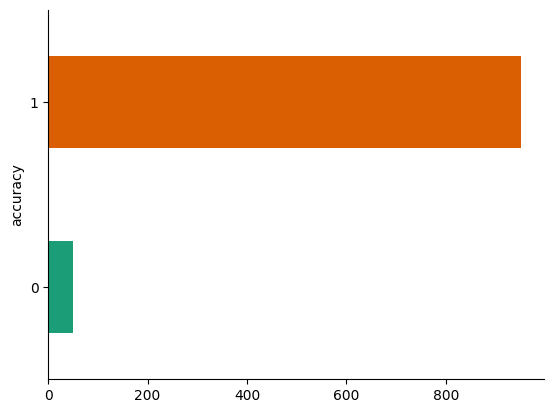

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
results.groupby('accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)